In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Короче посмотри на датасет:
1) room_and_street // в этой фиче нужно поделить column на number_of_rooms и street_name

2) num of floors // в этой фиче тоже нужно поделить на два (в каком этаже находится сама квартира) и (общее кол этажей в зданий)

3) sqrft // первая цифра это общая площадь квартиры а вторая это площадь кухни(также подели на два колумна)

4) description // там есть инфо по материалу стены(монолитный,кирпичный,панельный) через эти категориальные данные нужно сделать новую фичу(type of wall)

5) rieltor // просто тоже превратить в категориальную данные(риэлтор,агенство,компания и частное лицо)

6) price // тут понятно я думаю 

ДОЛЖНО ВЫЙТИ 10 ФИЧЕЙ(num_of_rooms, street_name, num_of_floors, sum_of_floors, year, overall_area, area_of_kitchen, type_of_wall, rieltor, price)

In [2]:
df = pd.read_csv('final_df_all_districts.csv')
df.head()

,rooms_and_street,num_of_floors,sqrft,year_of_build,description,date,rieltor,price,district
0,"3-комнатная квартира, Манаса, 22/2 - Кудайберд...",3/10 этаж,площадь: 80/13,год постройки: 2012,"\n ЖК Омир,...",Вчера,\nЧастное лицо\n,\nСрочно!\n ...,Алматы
1,"2-комнатная квартира, Тауелсыздык, 34/1",13/17 этаж,площадь: 70/11.2,год постройки: 2010,\n ЖК Алтын...,15.05.24,\nЧастное лицо\n,\n\n 26...,Алматы
2,"2-комнатная квартира, Кошкарбаева, 36",10/21 этаж,площадь: 63.3/9.9,год постройки: 2023,\n ЖК Tomir...,02.05.24,\nNur Astana Kurylys (застройщик)\n,\n ...,Алматы
3,"3-комнатная квартира, Кошкарбаева",6/23 этаж,площадь: 100,год постройки: 2014,\n ЖК Хайви...,Сегодня,\nKazRealty (агентство)\n,\n ...,Алматы
4,"1-комнатная квартира, Болекпаева, 22 - Байтурс...",7/9 этаж,площадь: 38/10,год постройки: 2023,\n ЖК Aibik...,Сегодня,\nЧастное лицо\n,\n ...,Алматы


In [3]:
df.shape

(20768, 9)

# Data Preprocessing

Dividing columns into specific columns

In [4]:
df[['num_of_rooms','street_name','delete','delete2']] = df['rooms_and_street'].str.split(",",expand=True)

In [5]:
df[['floor_of_flat','sum_of_floors']] = df['num_of_floors'].str.split("/",expand=True)

In [6]:
df[['area_of_flat','area_of_kitchen']] = df['sqrft'].str.split("/",expand=True)

In [7]:
df.drop(['sqrft','num_of_floors','street_name','delete','delete2'],axis=1,inplace=True)

In [8]:
df.drop(['rooms_and_street'],axis=1,inplace=True)

In [9]:
df.head()

,year_of_build,description,date,rieltor,price,district,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,area_of_kitchen
0,год постройки: 2012,"\n ЖК Омир,...",Вчера,\nЧастное лицо\n,\nСрочно!\n ...,Алматы,3-комнатная квартира,3,10 этаж,площадь: 80,13
1,год постройки: 2010,\n ЖК Алтын...,15.05.24,\nЧастное лицо\n,\n\n 26...,Алматы,2-комнатная квартира,13,17 этаж,площадь: 70,11.2
2,год постройки: 2023,\n ЖК Tomir...,02.05.24,\nNur Astana Kurylys (застройщик)\n,\n ...,Алматы,2-комнатная квартира,10,21 этаж,площадь: 63.3,9.9
3,год постройки: 2014,\n ЖК Хайви...,Сегодня,\nKazRealty (агентство)\n,\n ...,Алматы,3-комнатная квартира,6,23 этаж,площадь: 100,None
4,год постройки: 2023,\n ЖК Aibik...,Сегодня,\nЧастное лицо\n,\n ...,Алматы,1-комнатная квартира,7,9 этаж,площадь: 38,10


In [10]:
df['district'].value_counts()

Алматы      6712
Есил        6207
Сарыарка    3236
Нура        3104
Байконыр    1509
Name: district, dtype: int64

Data correction

In [11]:
df['year_of_build'] = df['year_of_build'].str.replace('год постройки:','')

In [12]:
df['year_of_build'] = df['year_of_build'].str.replace(' ','')

In [13]:
df['num_of_rooms'] = df['num_of_rooms'].str.replace('-комнатная квартира','')

In [14]:
df['sum_of_floors'] = df['sum_of_floors'].str.replace(' этаж','')

In [15]:
df['area_of_flat'] = df['area_of_flat'].str.replace('площадь:','')

In [16]:
count = 0
for elem in df['description']:
    if 'панельный' in elem:
        count+=1
count

1391

In [17]:
count = 0
for elem in df['description']:
    if 'кирпич' in elem:
        count+=1
count

9362

In [18]:
count = 0
for elem in df['description']:
    if 'монолит' in elem:
        count+=1
count

8153

In [19]:
count = 0
for elem in df['description']:
    if 'ЖК' in elem:
        count+=1
count

16719

In [20]:
df['description'][5]

'\n                                    ЖК Туркестан, монолитный. Срочная продажа 2-комнатной квартиры в ЖК Туркестан. Самое удобное месторасположение с развитой инфраструктурой в центре Алматинского района. Квартира...                            '

Data transformation

In [21]:
df['description'].mask(df['description'].str.contains('монолит') == True, 'монолитный', inplace=True)

In [22]:
df['description'].mask(df['description'].str.contains('кирпич') == True, 'кирпичный', inplace=True)

In [23]:
df['description'].mask(df['description'].str.contains('панельный') == True, 'панельный', inplace=True)

In [24]:
df['description'].mask(df['description'].str.contains('блоч') == True, 'блочный', inplace=True)

In [25]:
df['description'].mask(df['description'].str.contains('дерев') == True, 'деревянный', inplace=True)

In [26]:
df['description'].value_counts()

кирпичный     9248
монолитный    8153
блочный       1997
панельный     1369
деревянный       1
Name: description, dtype: int64

In [27]:
index_names = df[ df['description'] == 'деревянный' ].index 
df.drop(index_names, inplace = True) 

In [28]:
df.head()

,year_of_build,description,date,rieltor,price,district,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,area_of_kitchen
0,2012,кирпичный,Вчера,\nЧастное лицо\n,\nСрочно!\n ...,Алматы,3,3,10,80,13
1,2010,монолитный,15.05.24,\nЧастное лицо\n,\n\n 26...,Алматы,2,13,17,70,11.2
2,2023,монолитный,02.05.24,\nNur Astana Kurylys (застройщик)\n,\n ...,Алматы,2,10,21,63.3,9.9
3,2014,монолитный,Сегодня,\nKazRealty (агентство)\n,\n ...,Алматы,3,6,23,100,None
4,2023,кирпичный,Сегодня,\nЧастное лицо\n,\n ...,Алматы,1,7,9,38,10


In [29]:
df['price'][1]

'\n\n                                        26 000 000 ₸ / 371\xa0429 ₸ за м2 '

Price column transformation and correction

In [30]:
df[['PRICE','price_per_squrft']] = df['price'].str.split("/",expand=True)

In [31]:
df.drop(['price'],axis=1,inplace=True)

In [32]:
df['PRICE'] = df['PRICE'].str.replace(' ','')

In [33]:
df['PRICE'] = df['PRICE'].str.replace("\n",'')

In [34]:
df['PRICE'] = df['PRICE'].str.replace("₸",'')

In [35]:
df['PRICE'] = df['PRICE'].str.replace("Срочно!",'')

In [36]:
df.drop(['price_per_squrft','rieltor'],axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20767 entries, 0 to 20767
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year_of_build    20767 non-null  object
 1   description      20767 non-null  object
 2   date             20767 non-null  object
 3   district         20767 non-null  object
 4   num_of_rooms     20767 non-null  object
 5   floor_of_flat    20767 non-null  object
 6   sum_of_floors    20767 non-null  object
 7   area_of_flat     20767 non-null  object
 8   area_of_kitchen  1798 non-null   object
 9   PRICE            20767 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


Changing dtypes to appropriate ones

In [38]:
df['PRICE'] = df['PRICE'].apply(pd.to_numeric)

In [39]:
df['PRICE'] = df['PRICE']/444.5

In [40]:
df['year_of_build'] = df['year_of_build'].apply(pd.to_numeric)

In [41]:
df['num_of_rooms'] = df['num_of_rooms'].apply(pd.to_numeric)

In [42]:
df['floor_of_flat'] = df['floor_of_flat'].apply(pd.to_numeric)

In [43]:
df['sum_of_floors'] = df['sum_of_floors'].apply(pd.to_numeric)

In [44]:
df['area_of_flat'] = df['area_of_flat'].apply(pd.to_numeric)

In [45]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('студия','0')

In [46]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('None','')

In [47]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace(',','')

In [48]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('-','')

In [49]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('студии','0')

In [50]:
df['area_of_kitchen'] = df['area_of_kitchen'].str.replace('Студия','0')

In [51]:
df['area_of_kitchen'] = df['area_of_kitchen'].apply(pd.to_numeric)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20767 entries, 0 to 20767
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_build    20767 non-null  int64  
 1   description      20767 non-null  object 
 2   date             20767 non-null  object 
 3   district         20767 non-null  object 
 4   num_of_rooms     20767 non-null  float64
 5   floor_of_flat    20767 non-null  int64  
 6   sum_of_floors    20767 non-null  int64  
 7   area_of_flat     20767 non-null  float64
 8   area_of_kitchen  1798 non-null   float64
 9   PRICE            20767 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.2+ MB


In [53]:
df.drop(['date'],axis=1,inplace=True)

In [54]:
df.isnull().sum()

year_of_build          0
description            0
district               0
num_of_rooms           0
floor_of_flat          0
sum_of_floors          0
area_of_flat           0
area_of_kitchen    18969
PRICE                  0
dtype: int64

C:\Users\askha\AppData\Local\Temp\ipykernel_3400\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

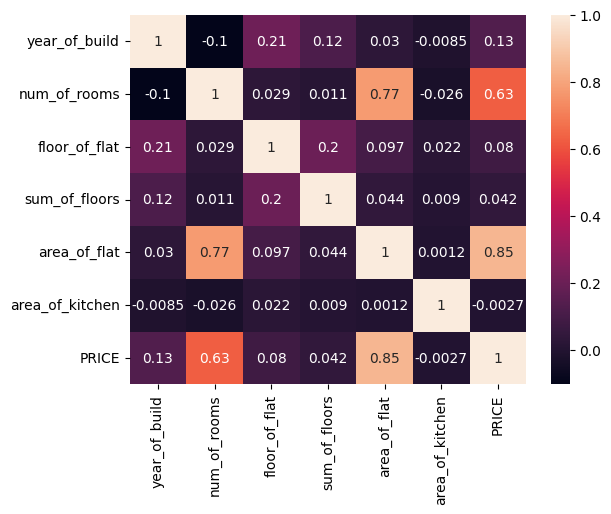

In [55]:
sns.heatmap(df.corr(),annot=True)

In [56]:
df.drop(['area_of_kitchen'],axis=1,inplace=True)
#deleting because of negative correlation with target variable "price"

In [57]:
df.head()

,year_of_build,description,district,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,PRICE
0,2012,кирпичный,Алматы,3.0,3,10,80.0,58492.688414
1,2010,монолитный,Алматы,2.0,13,17,70.0,58492.688414
2,2023,монолитный,Алматы,2.0,10,21,63.3,55538.807649
3,2014,монолитный,Алматы,3.0,6,23,100.0,140607.424072
4,2023,кирпичный,Алматы,1.0,7,9,38.0,35545.556805


# Data Vizualization

In [58]:
sns.set(rc={"figure.figsize":(6,3)}) 

<AxesSubplot: xlabel='district', ylabel='count'>

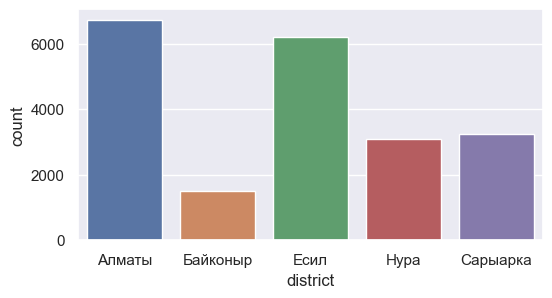

In [59]:
sns.countplot(x=df['district'],data=df)

<AxesSubplot: xlabel='description', ylabel='count'>

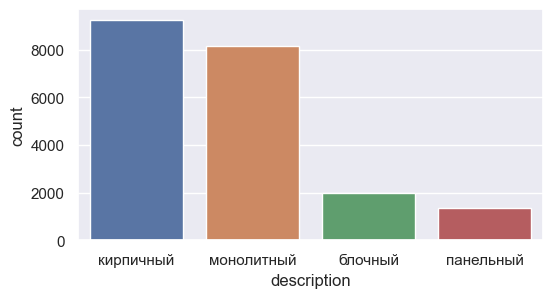

In [60]:
sns.countplot(x=df['description'],data=df)

<AxesSubplot: xlabel='district', ylabel='PRICE'>

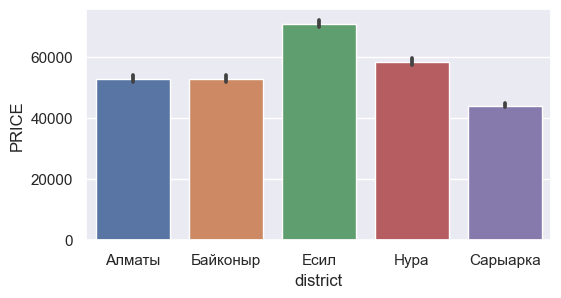

In [61]:
sns.barplot(x=df['district'],y=df['PRICE'],data=df,estimator='median')

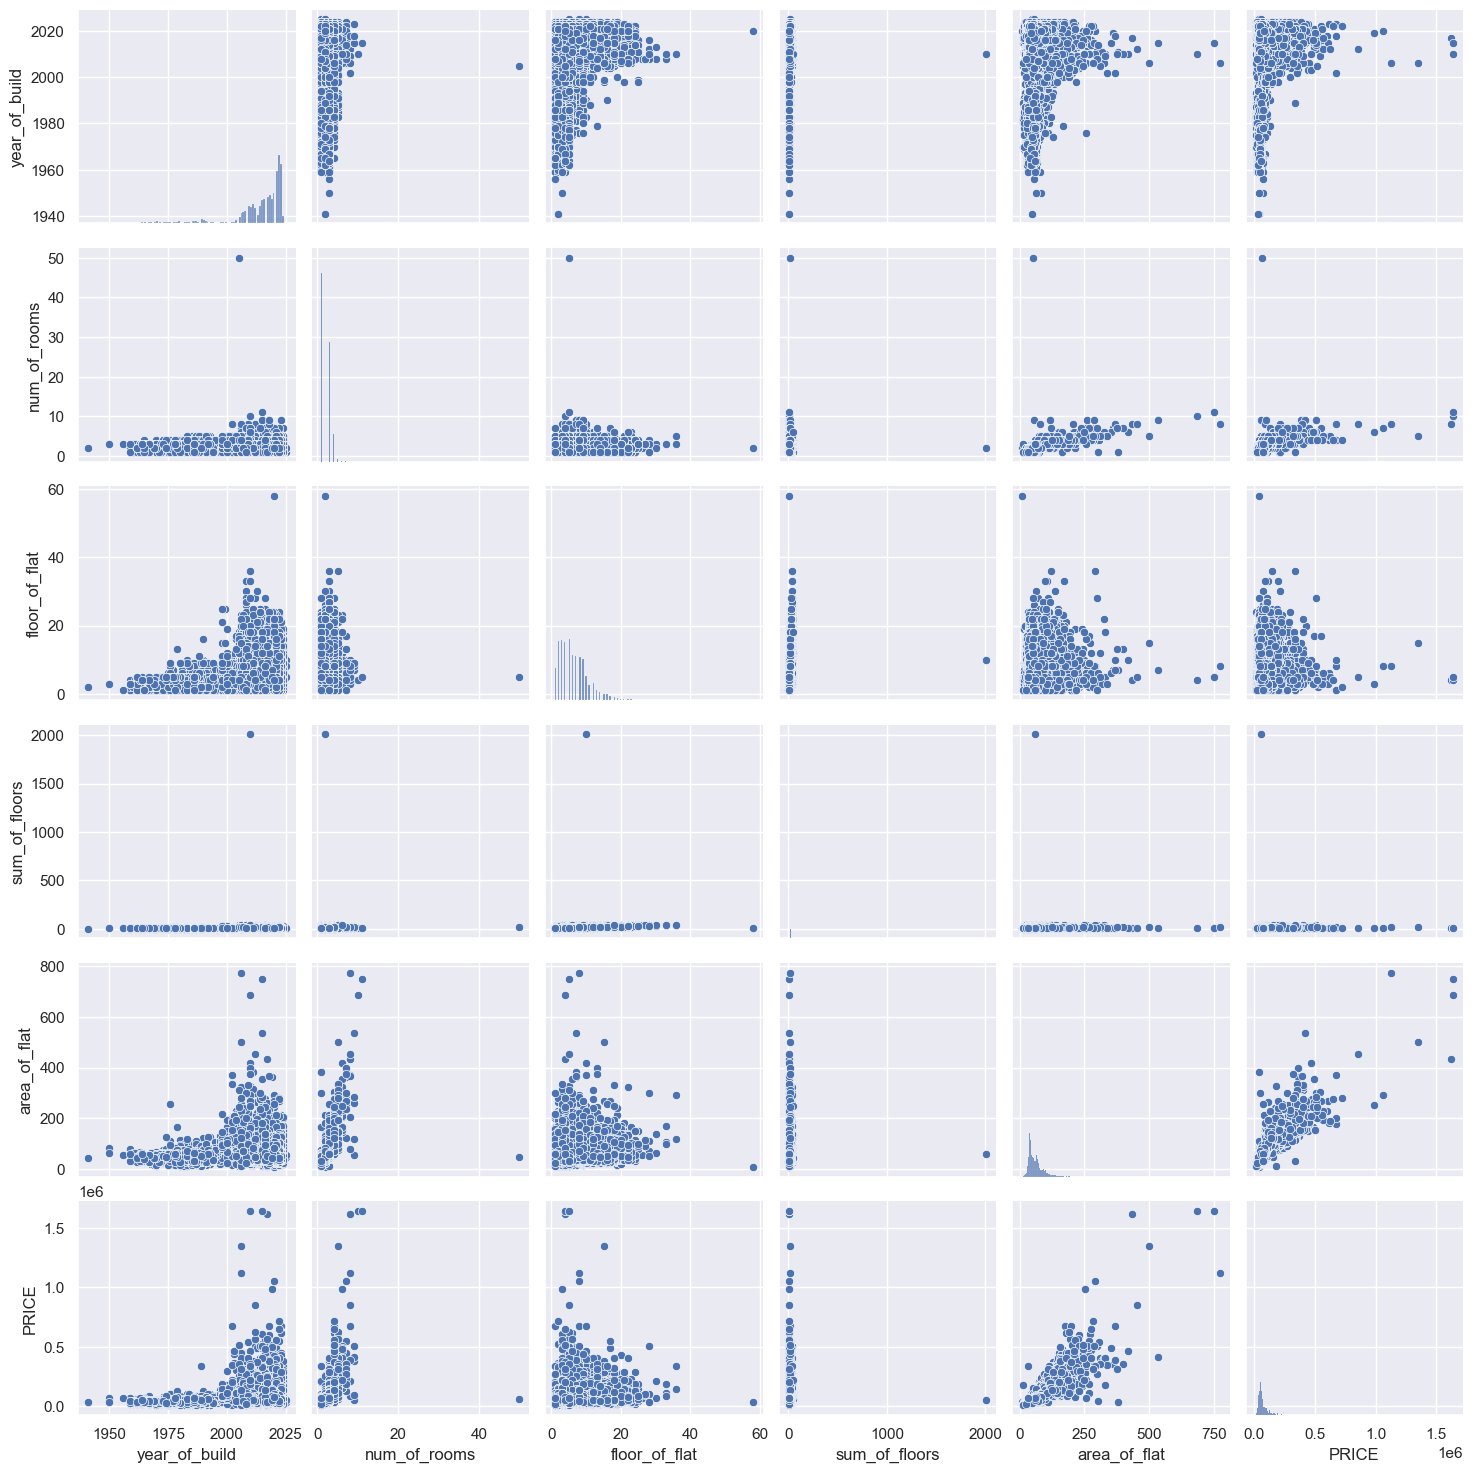

In [62]:
sns.pairplot(df)

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.head()

,year_of_build,description,district,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,PRICE
0,2012,кирпичный,Алматы,3.0,3,10,80.0,58492.688414
1,2010,монолитный,Алматы,2.0,13,17,70.0,58492.688414
2,2023,монолитный,Алматы,2.0,10,21,63.3,55538.807649
3,2014,монолитный,Алматы,3.0,6,23,100.0,140607.424072
4,2023,кирпичный,Алматы,1.0,7,9,38.0,35545.556805


Encoding of categorical data(for RandomForest)

In [65]:
import category_encoders as ce

In [66]:
encoder = ce.OneHotEncoder(cols=['description','district'])

In [67]:
df_encoded = df.copy()

In [68]:
df_encoded = encoder.fit_transform(df_encoded)

In [69]:
df_encoded.head()

,year_of_build,description_1,description_2,description_3,description_4,district_1,district_2,district_3,district_4,district_5,num_of_rooms,floor_of_flat,sum_of_floors,area_of_flat,PRICE
0,2012,1,0,0,0,1,0,0,0,0,3.0,3,10,80.0,58492.688414
1,2010,0,1,0,0,1,0,0,0,0,2.0,13,17,70.0,58492.688414
2,2023,0,1,0,0,1,0,0,0,0,2.0,10,21,63.3,55538.807649
3,2014,0,1,0,0,1,0,0,0,0,3.0,6,23,100.0,140607.424072
4,2023,1,0,0,0,1,0,0,0,0,1.0,7,9,38.0,35545.556805


In [70]:
df_encoded.isnull().sum()

year_of_build    0
description_1    0
description_2    0
description_3    0
description_4    0
district_1       0
district_2       0
district_3       0
district_4       0
district_5       0
num_of_rooms     0
floor_of_flat    0
sum_of_floors    0
area_of_flat     0
PRICE            0
dtype: int64

<AxesSubplot: xlabel='PRICE', ylabel='Count'>

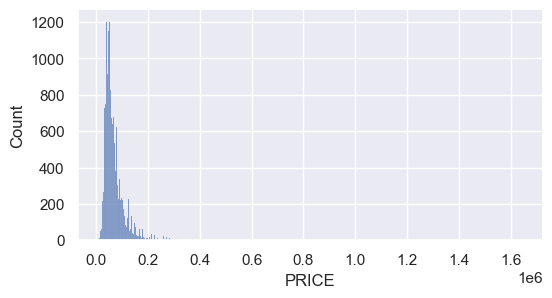

In [71]:
sns.histplot(x=df_encoded['PRICE'])

In [72]:
Q1 = df_encoded['PRICE'].quantile(0.25)
Q3 = df_encoded['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_encoded[(df_encoded['PRICE'] > lower_bound) & (df_encoded['PRICE'] < upper_bound)]

In [73]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [74]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [75]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [76]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [77]:
Q1 = df_filtered['PRICE'].quantile(0.25)
Q3 = df_filtered['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['PRICE'] > lower_bound) & (df_filtered['PRICE'] < upper_bound)]

In [78]:
df_filtered.shape

(18344, 15)

<AxesSubplot: xlabel='PRICE'>

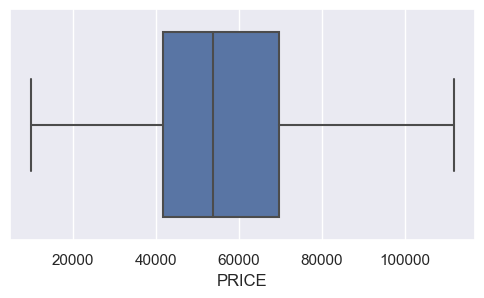

In [79]:
sns.boxplot(x=df_filtered['PRICE'])

# Model training

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x = df_encoded.drop(['PRICE'],axis=1)
y = df_encoded['PRICE']

In [82]:
# using the train test split function  
x_train,x_test,y_train, y_test = train_test_split(x,y , 
                                   random_state=42,  
                                   test_size=0.3) 

Model(data with outliers) without hyperparameter tuning

In [83]:
from catboost import CatBoostRegressor 
model = CatBoostRegressor().fit(x_train,y_train)

Learning rate set to 0.062451
0:	learn: 49271.5125602	total: 128ms	remaining: 2m 7s
1:	learn: 47374.1505796	total: 130ms	remaining: 1m 5s
2:	learn: 45571.8363190	total: 133ms	remaining: 44.2s
3:	learn: 43897.3583076	total: 137ms	remaining: 34s
4:	learn: 42357.6074578	total: 139ms	remaining: 27.7s
5:	learn: 40975.9074297	total: 142ms	remaining: 23.5s
6:	learn: 39687.3212002	total: 145ms	remaining: 20.5s
7:	learn: 38451.5402268	total: 147ms	remaining: 18.2s
8:	learn: 37243.5566069	total: 150ms	remaining: 16.5s
9:	learn: 36212.3394164	total: 152ms	remaining: 15.1s
10:	learn: 35245.3704193	total: 155ms	remaining: 13.9s
11:	learn: 34292.8153782	total: 157ms	remaining: 13s
12:	learn: 33438.2307990	total: 160ms	remaining: 12.2s
13:	learn: 32645.9745825	total: 163ms	remaining: 11.5s
14:	learn: 31888.5004429	total: 165ms	remaining: 10.8s
15:	learn: 31192.6683791	total: 169ms	remaining: 10.4s
16:	learn: 30569.4975119	total: 171ms	remaining: 9.91s
17:	learn: 29997.1354653	total: 174ms	remaining: 

In [84]:
y_pred = model.predict(x_test)

In [85]:
pd.DataFrame(y_test)

,PRICE
12965,116985.376828
4061,53993.250844
15261,50618.672666
8422,101426.321710
10088,134983.127109
...,...
4070,75590.551181
5695,62767.154106
10126,65241.844769
17186,102362.204724


In [86]:
pd.DataFrame(y_pred)

,0
0,118666.943439
1,41012.847835
2,45803.071624
3,117242.341105
4,158722.311674
...,...
6197,61418.002227
6198,62239.234842
6199,76287.293371
6200,101480.435261


In [87]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test,y_pred)

0.7647390311477383

In [88]:
mean_squared_error(y_test,y_pred,squared=False)

28594.45447978641

Model(data without outliers) without hyperparameter tuning

In [89]:
x = df_filtered.drop(['PRICE'],axis=1)
y = df_filtered['PRICE']

In [90]:
# using the train test split function  
x_train,x_test,y_train, y_test = train_test_split(x,y , 
                                   random_state=42,  
                                   test_size=0.3) 

In [91]:
from catboost import CatBoostRegressor 
model = CatBoostRegressor().fit(x_train,y_train)

Learning rate set to 0.061282
0:	learn: 19557.7319638	total: 4.94ms	remaining: 4.93s
1:	learn: 18751.9381511	total: 7.96ms	remaining: 3.97s
2:	learn: 18003.4436920	total: 11.9ms	remaining: 3.97s
3:	learn: 17296.1779598	total: 14.7ms	remaining: 3.67s
4:	learn: 16667.3159316	total: 17.7ms	remaining: 3.53s
5:	learn: 16090.2791097	total: 20.2ms	remaining: 3.34s
6:	learn: 15533.2263653	total: 22.6ms	remaining: 3.21s
7:	learn: 15038.0183615	total: 25.5ms	remaining: 3.16s
8:	learn: 14560.3107747	total: 28.5ms	remaining: 3.14s
9:	learn: 14136.1735483	total: 33.1ms	remaining: 3.28s
10:	learn: 13753.9328014	total: 35.6ms	remaining: 3.2s
11:	learn: 13393.2148154	total: 38.4ms	remaining: 3.16s
12:	learn: 13059.4226876	total: 41ms	remaining: 3.12s
13:	learn: 12746.8674305	total: 43.5ms	remaining: 3.07s
14:	learn: 12469.0798565	total: 46ms	remaining: 3.02s
15:	learn: 12198.0756745	total: 48.5ms	remaining: 2.98s
16:	learn: 11953.6807703	total: 51.1ms	remaining: 2.96s
17:	learn: 11727.0561753	total: 5

In [92]:
y_pred = model.predict(x_test)

In [93]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test,y_pred)

0.8136016364510392

In [94]:
mean_squared_error(y_test,y_pred,squared=False)

8868.309979998185

Model with hyperparameter tuning with optuna

In [95]:
import optuna

In [96]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations",100,1000,step=100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [97]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-05-22 23:50:41,899] A new study created in memory with name: no-name-a0146dcc-d952-4b58-add1-51d72b2423ed
[I 2024-05-22 23:50:43,135] Trial 0 finished with value: 9507.981571963865 and parameters: {'iterations': 600, 'learning_rate': 0.0072641703843927844, 'depth': 4, 'subsample': 0.9305323828584193, 'colsample_bylevel': 0.6693776049224168, 'min_data_in_leaf': 58}. Best is trial 0 with value: 9507.981571963865.
[I 2024-05-22 23:50:44,135] Trial 1 finished with value: 11310.988056421249 and parameters: {'iterations': 600, 'learning_rate': 0.0028074945105819446, 'depth': 3, 'subsample': 0.834606347123169, 'colsample_bylevel': 0.9460678905986161, 'min_data_in_leaf': 77}. Best is trial 0 with value: 9507.981571963865.
[I 2024-05-22 23:50:45,682] Trial 2 finished with value: 9945.42969883202 and parameters: {'iterations': 700, 'learning_rate': 0.006006967585030374, 'depth': 6, 'subsample': 0.6351123975888564, 'colsample_bylevel': 0.18760606836232896, 'min_data_in_leaf': 48}. Best is

In [98]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'iterations': 500, 'learning_rate': 0.08917385762956073, 'depth': 9, 'subsample': 0.6851493189568783, 'colsample_bylevel': 0.5391577070032018, 'min_data_in_leaf': 32}
Best RMSE: 8790.177252955398


In [99]:
optuna.visualization.plot_optimization_history(study)

In [101]:
model = CatBoostRegressor(iterations=500,learning_rate= 0.08917385762956073,depth=9,subsample= 0.6851493189568783,colsample_bylevel=0.5391577070032018,min_data_in_leaf=32).fit(x_train,y_train)

0:	learn: 19127.6753094	total: 7.44ms	remaining: 3.71s
1:	learn: 18050.0759342	total: 13.3ms	remaining: 3.32s
2:	learn: 17041.2890660	total: 20.3ms	remaining: 3.36s
3:	learn: 16122.6625347	total: 24.6ms	remaining: 3.06s
4:	learn: 15301.0009989	total: 31.2ms	remaining: 3.09s
5:	learn: 14574.1612642	total: 36.3ms	remaining: 2.99s
6:	learn: 13935.5056595	total: 41.4ms	remaining: 2.91s
7:	learn: 13356.5412911	total: 47.5ms	remaining: 2.92s
8:	learn: 12847.3431824	total: 51.4ms	remaining: 2.8s
9:	learn: 12435.6531642	total: 53.8ms	remaining: 2.64s
10:	learn: 12043.8366198	total: 63.5ms	remaining: 2.82s
11:	learn: 11687.6440542	total: 70.6ms	remaining: 2.87s
12:	learn: 11372.8328128	total: 77.4ms	remaining: 2.9s
13:	learn: 11098.3987316	total: 82.1ms	remaining: 2.85s
14:	learn: 10853.4546851	total: 86.5ms	remaining: 2.8s
15:	learn: 10650.4098064	total: 92.2ms	remaining: 2.79s
16:	learn: 10466.6266856	total: 96.6ms	remaining: 2.74s
17:	learn: 10309.9893283	total: 102ms	remaining: 2.74s
18:	le

In [102]:
y_pred = model.predict(x_test)

In [103]:
pd.DataFrame(y_pred)

,0
0,31631.304587
1,49865.370351
2,79401.817091
3,26243.807901
4,45952.554625
...,...
5499,53648.078226
5500,48448.835105
5501,62207.501247
5502,89263.432191


In [104]:
pd.DataFrame(y_test)

,PRICE
18370,33520.809899
3576,44994.375703
17172,64116.985377
7826,22497.187852
14594,49493.813273
...,...
17932,60742.407199
13113,33520.809899
8740,67491.563555
8087,91113.610799


In [105]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mean_squared_error(y_test,y_pred,squared=False)

8790.177252955398

In [106]:
mean_absolute_error(y_test,y_pred)

6478.613952931835

In [107]:
r2_score(y_test,y_pred)

0.8168716296075114

RandomForestRegression using RandomizedSearch and GridSearch

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
model = RandomForestRegressor().fit(x_train,y_train)

In [110]:
y_pred = model.predict(x_test)

In [111]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mean_squared_error(y_test,y_pred,squared=False)

9148.510026508682

In [112]:
r2_score(y_test,y_pred)

0.8016368016048715

In [113]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(RandomForestRegressor(), 
                        param_dist, 
                        n_iter = 100, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(x_train, y_train)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [114]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,600,23,2,sqrt,15,False,0.806285,0.809400,0.805766,1
1,700,12,2,sqrt,13,False,0.806198,0.809716,0.805666,2
2,400,23,2,sqrt,14,False,0.805605,0.808016,0.804548,3
3,700,23,7,log2,15,False,0.802818,0.804604,0.801052,4
4,700,2,2,log2,11,True,0.800569,0.803349,0.798879,5
5,300,28,7,log2,13,True,0.796551,0.797314,0.793368,6
6,100,2,18,sqrt,15,False,0.793957,0.793989,0.791191,7
7,500,12,18,sqrt,13,False,0.793329,0.794138,0.790668,8
8,800,28,12,sqrt,14,True,0.793774,0.793536,0.790587,9
9,1000,12,7,sqrt,10,True,0.791598,0.793363,0.788656,10


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='param_n_estimators', ylabel='mean_test_score'>

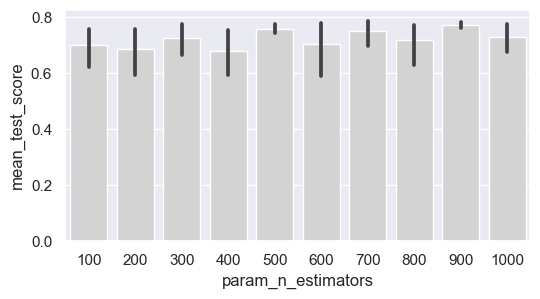

In [ ]:
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, color='lightgrey')
#n_estimators: 500,700,900

<AxesSubplot: xlabel='param_min_samples_split', ylabel='mean_test_score'>

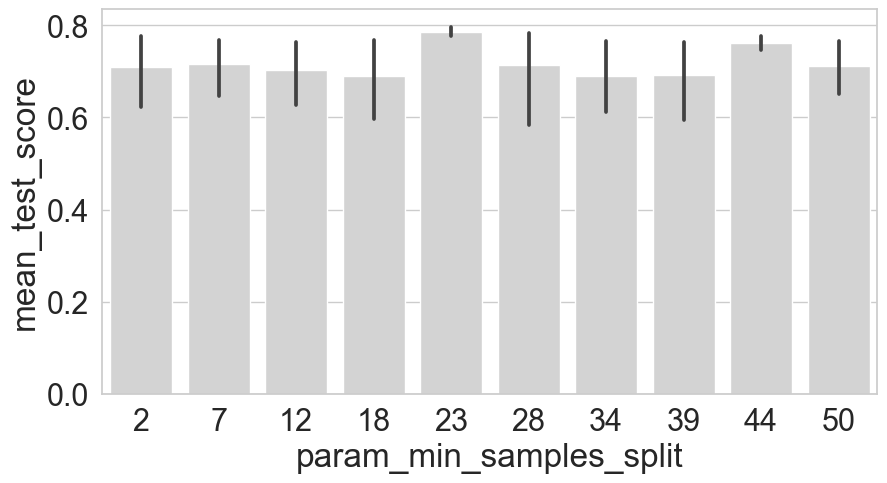

In [ ]:
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, color='lightgrey')
#min_samples_split = [23,24,25,44,45,46]

<AxesSubplot: xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

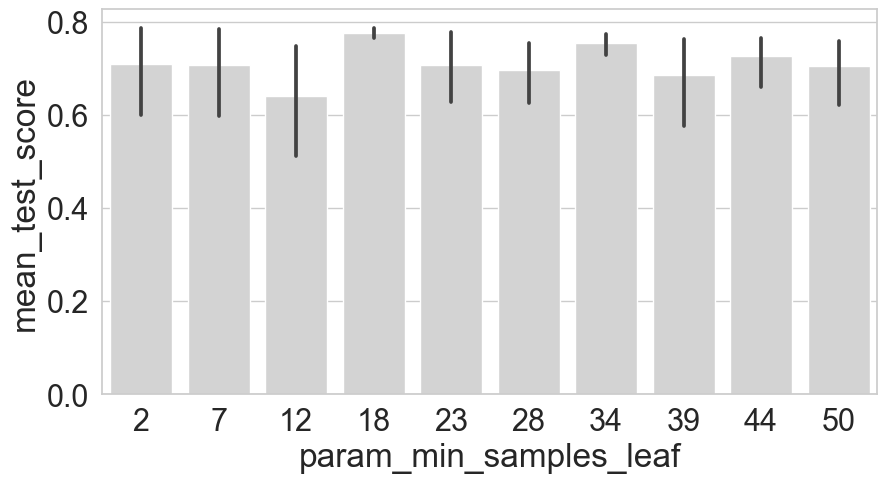

In [ ]:
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, color='lightgrey')

<AxesSubplot: xlabel='param_max_features', ylabel='mean_test_score'>

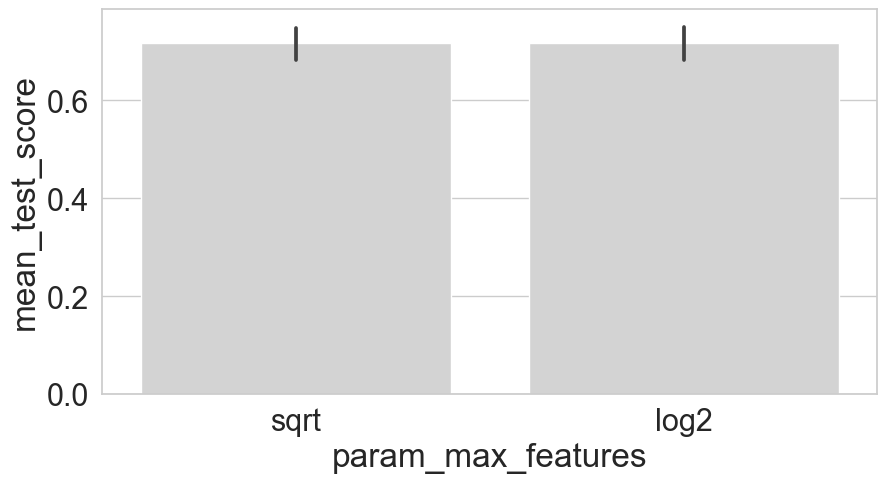

In [ ]:
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, color='lightgrey')

<AxesSubplot: xlabel='param_max_depth', ylabel='mean_test_score'>

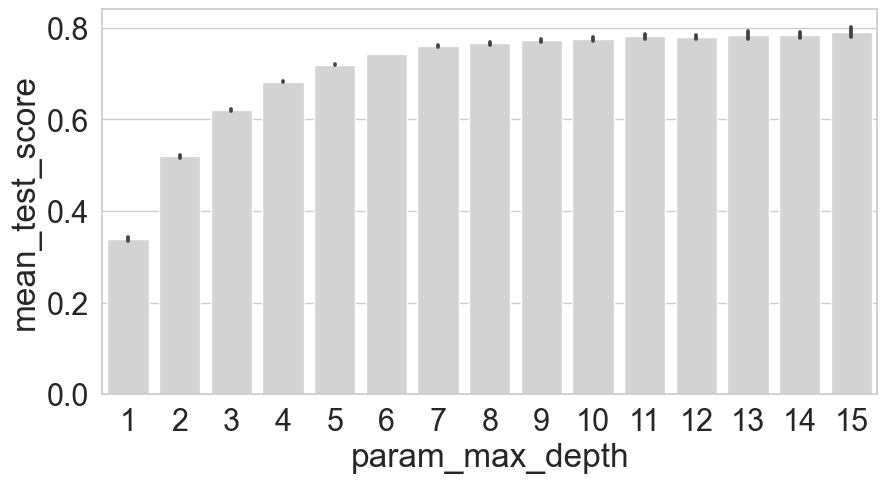

In [ ]:
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, color='lightgrey')
#param_max_depth = [13,14,15]

<AxesSubplot: xlabel='param_bootstrap', ylabel='mean_test_score'>

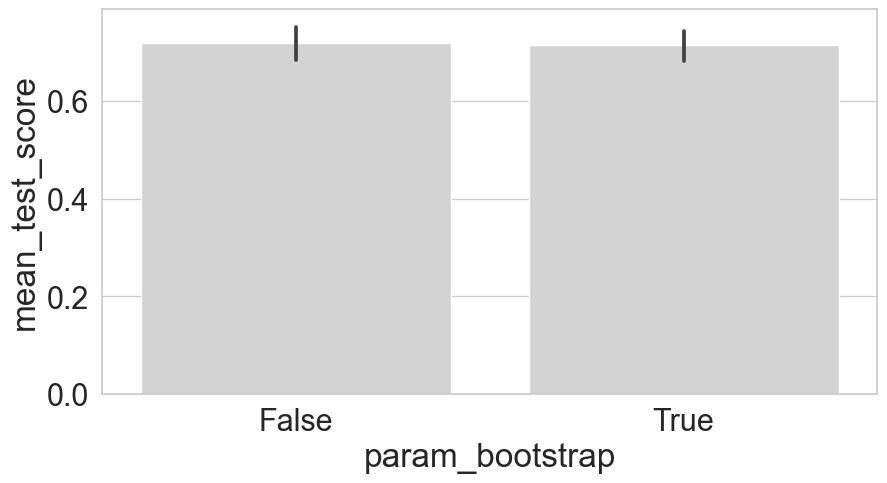

In [ ]:
sns.barplot(x='param_bootstrap', y='mean_test_score', data=rs_df, color='lightgrey')

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [500,600,700,900]
max_features = ['sqrt']
max_depth = [13,14,15]
min_samples_split = [23,24,25,44,45,46]
min_samples_leaf = [2,3,18,19,34,35]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(RandomForestRegressor(), param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(x_train, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 23,
 'n_estimators': 600}

In [ ]:
{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [115]:
model = RandomForestRegressor(bootstrap=False,max_depth=15,max_features='sqrt',min_samples_leaf=2,min_samples_split=23,n_estimators=600).fit(x_train,y_train)

In [116]:
y_pred = model.predict(x_test)

In [117]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mean_squared_error(y_test,y_pred,squared=False)

9019.208334042665

In [118]:
r2_score(y_test,y_pred)

0.8072043623446172

c:\Users\askha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



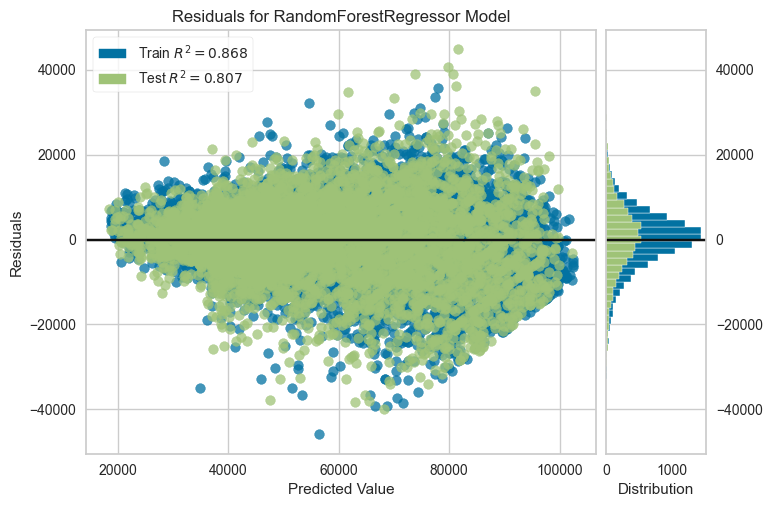

<AxesSubplot: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [119]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)  
visualizer.poof()